# Normalize Data

#### TOC
- [Provide Use Case Parameters](#Provide-Use-Case-Parameters)
- [Read DataFrame from the CSV file](#Read-DataFrame-from-the-CSV-file)
- [Function to normalize the data](#Function-to-normalize-the-data)
- [Write DataFrame to the CSV file](#Write-DataFrame-to-the-CSV-file)

# Provide Use Case Parameters

In [11]:
using DataFrames, CSV, Dates, Plots

file_name = "market_indicators.csv"
original_column = 5 # choose column to populate
normalized_column = 9 # choose column to be populated with normalized values

9

# Read DataFrame from the CSV file

In [3]:
df = CSV.read(file_name)

# Show the values of the cololumn with the original data
df[:, original_column]

1623-element Array{Float64,1}:
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    ⋮
 2976.74
 3037.56
 3037.56
 3140.98
 3140.98
 3230.78
 3230.78
 3225.52
 3225.52
 2954.22
 2954.22
 2954.22

In [4]:
# Show the values of the column with the data to be replaced

df[:, normalized_column]

1623-element Array{Float64,1}:
 -100.0
 -100.0
 -100.0
 -100.0
 -100.0
 -100.0
 -100.0
 -100.0
 -100.0
 -100.0
 -100.0
 -100.0
 -100.0
    ⋮
   84.27
   88.04
   88.04
   94.44
   94.44
  100.0
  100.0
   99.67
   99.67
   82.88
   82.88
   82.88

# Function to normalize the data

- takes a column (an array) of data as an input
- calculates minimum value of the column
- calculates maximum value of the column
- for each row it calculates:

$$ normalized_i = \frac{(value_i - min_{all})}{(max_{all} - min_{all})} $$

In [5]:
function normalize(df, original_column, normalized_column)
    original = df[:, original_column]
    items = length(original) 
    
    min = minimum(original)
    max = maximum(original)   

    for i in 1:items
        value = (original[i] - min) / (max - min) # normalization formula 0.0 to 1.0
        value = value * 200                    # 0.0 to 200
        value = value - 100                    # -100 to 100
        value = round(value, digits=2)         # 0.00 
        df[i, normalized_column] = value
    end
    return df[:, normalized_column]
end

data_normalized = normalize(df, original_column, normalized_column)

1623-element Array{Float64,1}:
 -100.0
 -100.0
 -100.0
 -100.0
 -100.0
 -100.0
 -100.0
 -100.0
 -100.0
 -100.0
 -100.0
 -100.0
 -100.0
    ⋮
   84.27
   88.04
   88.04
   94.44
   94.44
  100.0
  100.0
   99.67
   99.67
   82.88
   82.88
   82.88

# Get only years

In [6]:
dates = df[:,2]
dates[1]

1948-03-31

In [7]:
columns = length(dates)

1623

In [26]:
periods = Array{String, 1}(undef, columns)
print("")

In [27]:
for i in 1:columns
    periods[i] = string( Dates.month(dates[i]), "/", Dates.year(dates[i])   )
end
periods

1623-element Array{String,1}:
 "3/1948"
 "4/1948"
 "5/1948"
 "6/1948"
 "7/1948"
 "8/1948"
 "9/1948"
 "10/1948"
 "11/1948"
 "12/1948"
 "1/1949"
 "2/1949"
 "3/1949"
 ⋮
 "9/2019"
 "10/2019"
 "10/2019"
 "11/2019"
 "11/2019"
 "12/2019"
 "12/2019"
 "1/2020"
 "1/2020"
 "2/2020"
 "2/2020"
 "3/2020"

# Draw plots

- https://docs.juliaplots.org/latest/layouts/

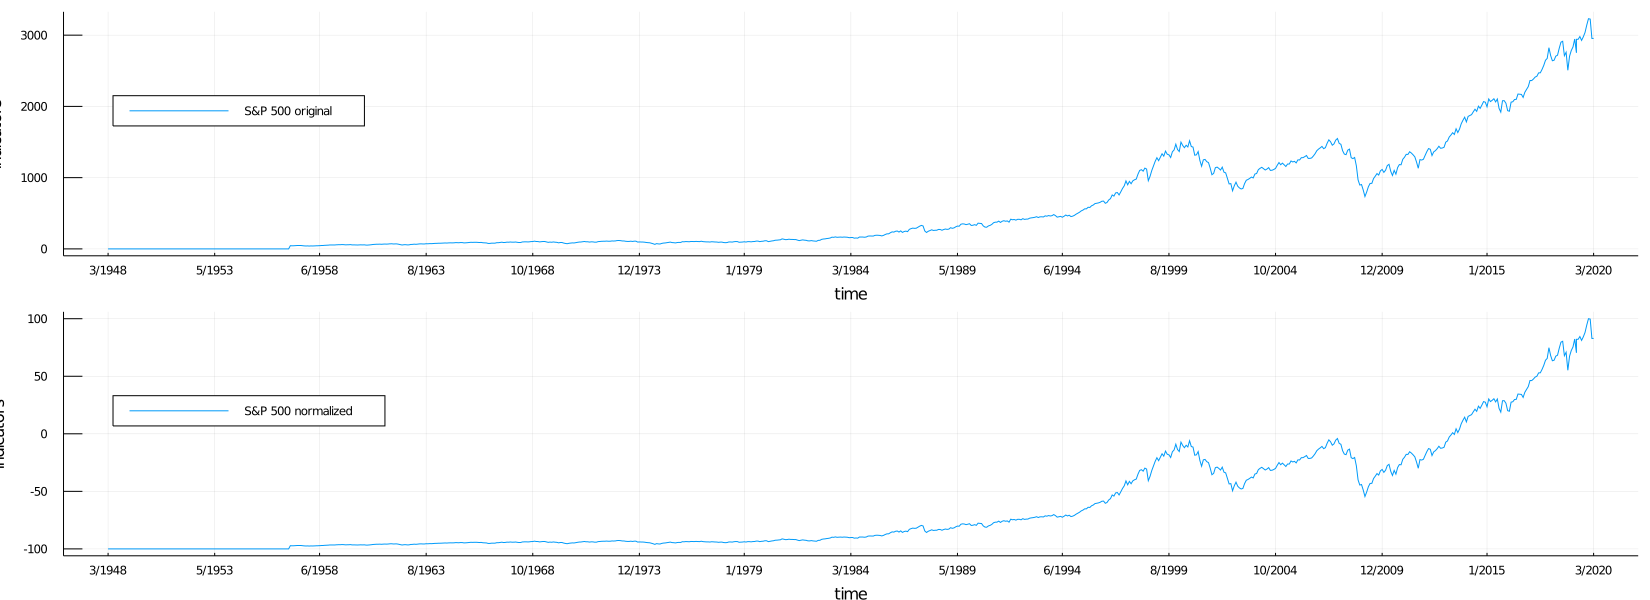

In [28]:
gr()
plot(periods, 
    [df[:,original_column]  df[:,normalized_column]  ], 
    label    = ["S&P 500 original" "S&P 500 normalized"],
    legend    =:topleft, # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (1650, 600), # width, height
    layout = (2, 1)
    )

# Write DataFrame to the CSV file

In [ ]:
CSV.write(file_name, df, delim=',', header=true)